In [ ]:
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
License(s): CC0-1.0
100% 6.03M/6.03M [00:00<00:00, 62.7MB/s]
100% 6.03M/6.03M [00:00<00:00, 62.4MB/s]


In [ ]:
!unzip /content/diabetes-health-indicators-dataset.zip -d /content/diabetes-health-indicators-dataset

Archive:  /content/diabetes-health-indicators-dataset.zip
  inflating: /content/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: /content/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: /content/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv  


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, RobustScaler

In [ ]:
features = pd.read_csv('/content/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [ ]:
features.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# PreProcessing


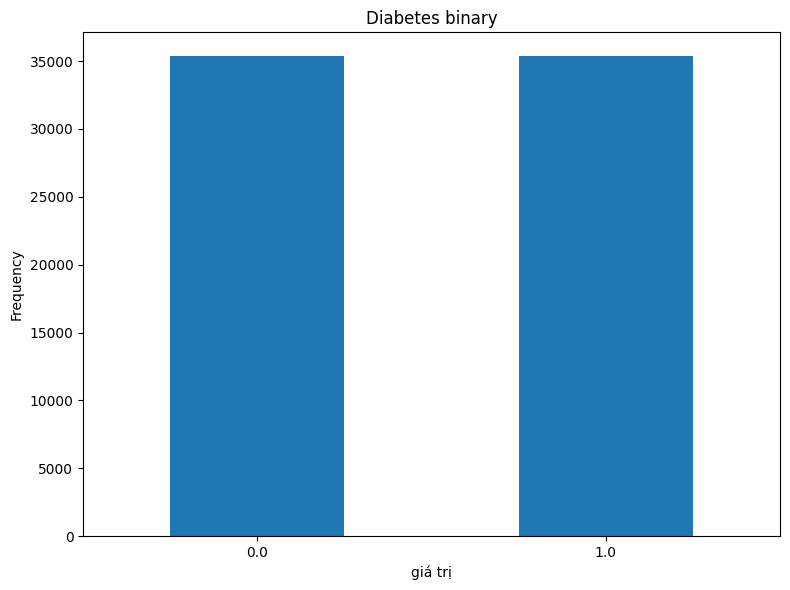

In [ ]:
# Tính tần suất của các giá trị phân loại
category_counts = features['Diabetes_binary'].value_counts()

# Vẽ biểu đồ cột
category_counts.plot(kind='bar', figsize=(8, 6))

# Tùy chỉnh biểu đồ
plt.title("Diabetes binary")
plt.xlabel("giá trị")
plt.ylabel("Frequency")
plt.xticks(rotation=0)  # Đảm bảo các tên category không bị nghiêng
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


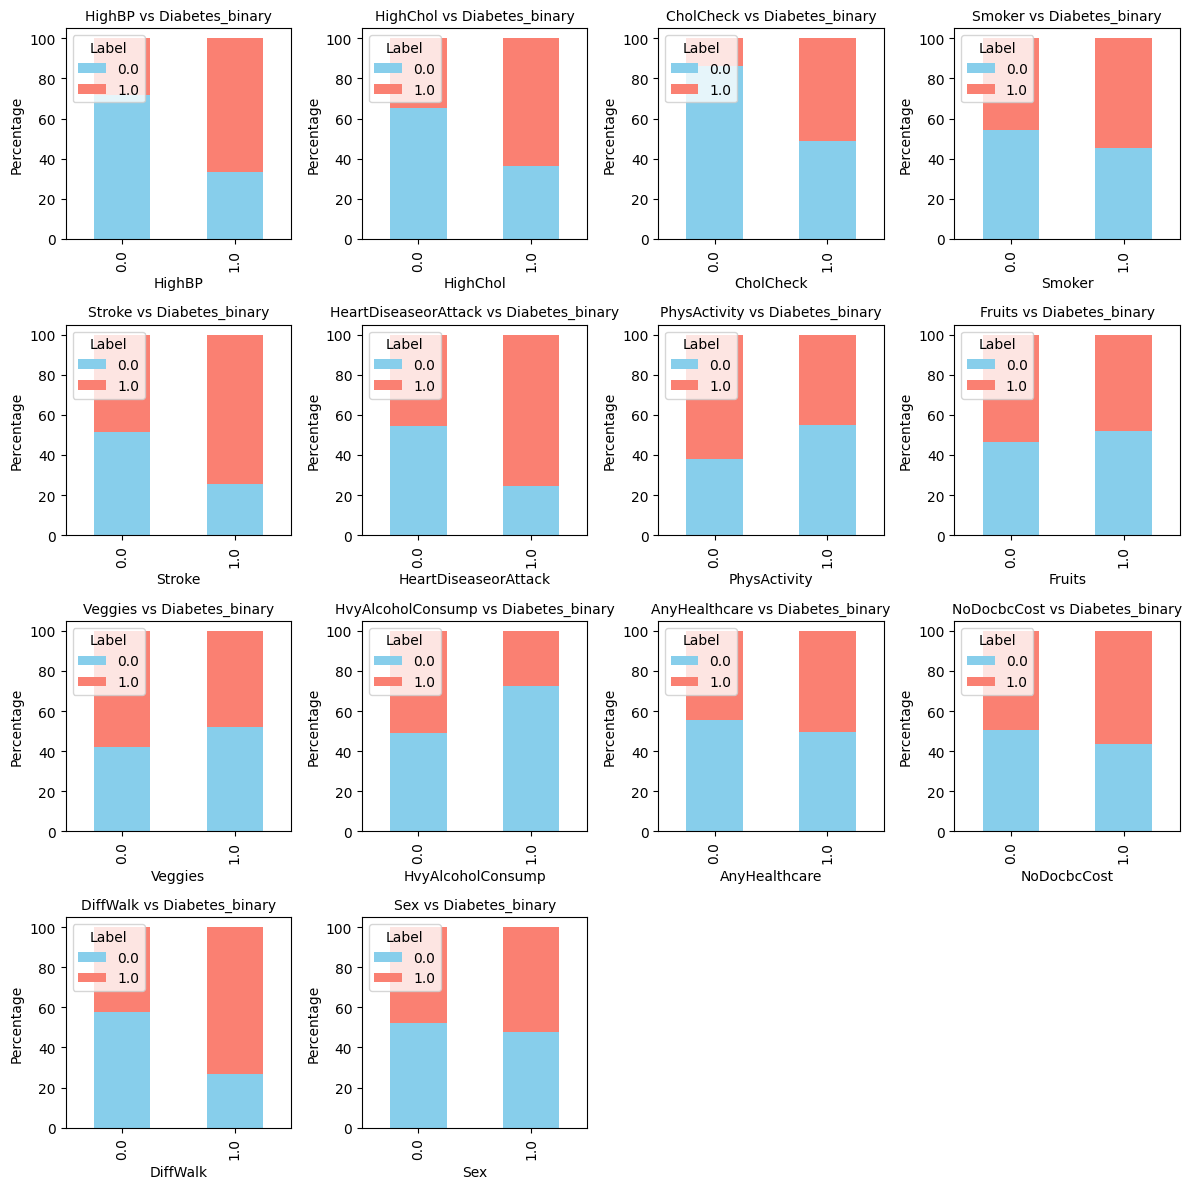

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử `features` là DataFrame chứa các cột cần vẽ
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']  # Các cột phân loại
target_col = 'Diabetes_binary'  # Cột mục tiêu

# Thiết lập kích thước lưới subplot
num_features = len(categorical_features)
fig, axes = plt.subplots(
    nrows=(num_features + 3) // 4,  # Số hàng
    ncols=4,                        # Số cột
    figsize=(12, 4 * ((num_features + 1) // 4)),  # Kích thước tổng thể
)

axes = axes.flatten()  # Chuyển axes thành 1D để dễ truy cập

for i, feature in enumerate(categorical_features):
    # Bảng tần suất chéo với phần trăm
    crosstab = pd.crosstab(
        features[feature],
        features[target_col],
        normalize='index'  # Chuẩn hóa theo hàng
    ) * 100

    # Vẽ biểu đồ stacked bar
    crosstab.plot(
        kind='bar',
        stacked=True,
        ax=axes[i],  # Subplot tương ứng
        color=['skyblue', 'salmon']  # Màu tùy chỉnh
    )

    # Tùy chỉnh tiêu đề và nhãn
    axes[i].set_title(f'{feature} vs {target_col}', fontsize=10)
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Percentage')
    axes[i].legend(title='Label', loc='upper left')

# Ẩn các subplot thừa (nếu có)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


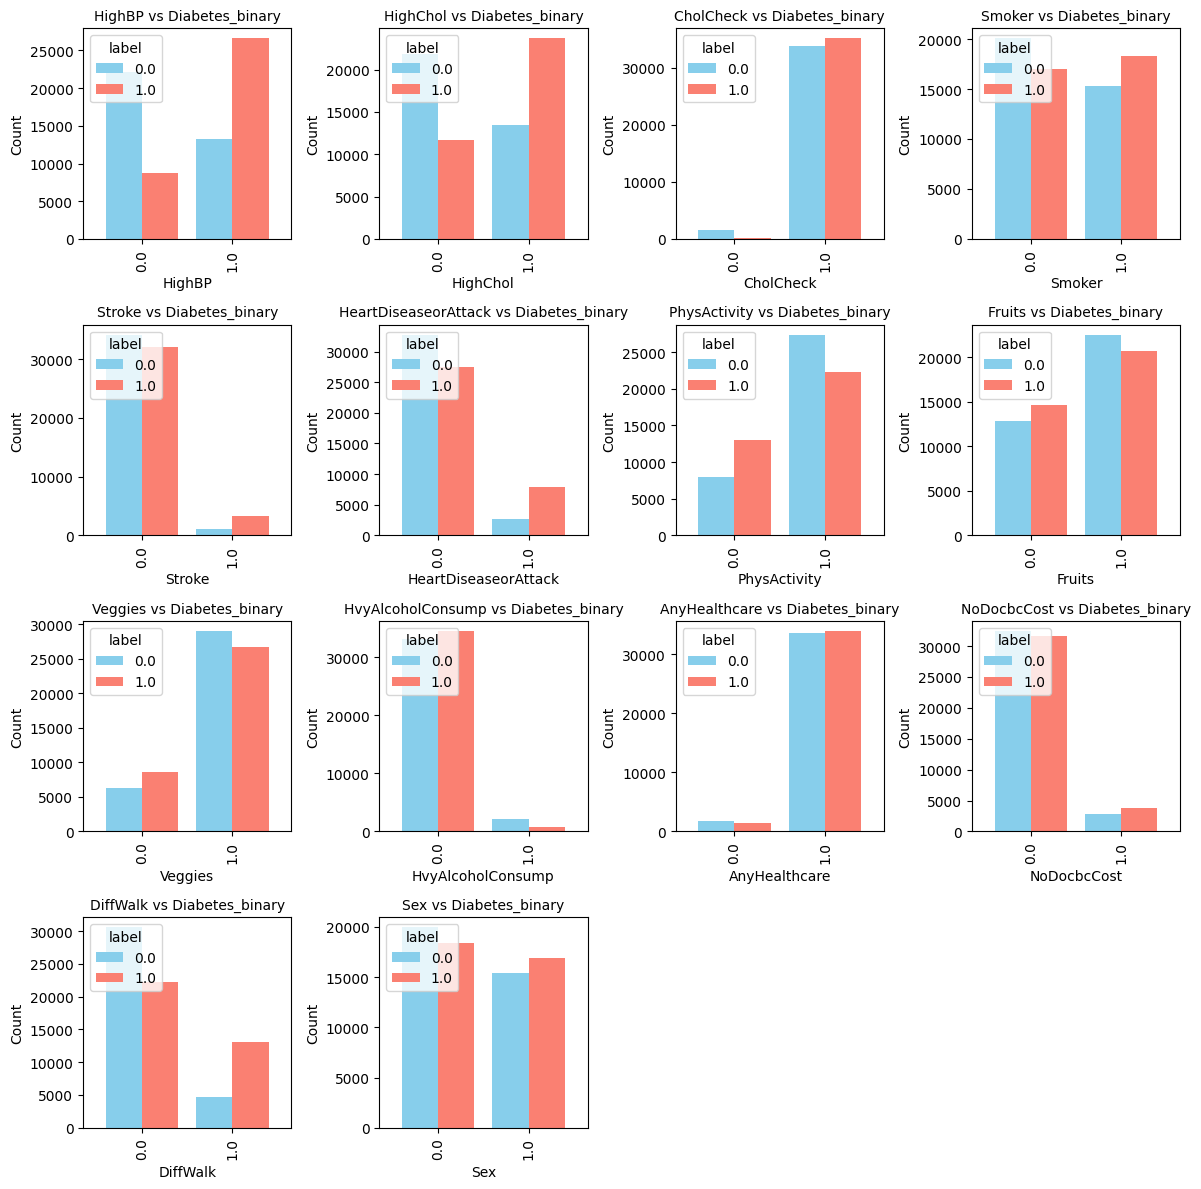

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử `features` là DataFrame chứa các cột cần vẽ
categorical_features = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'DiffWalk', 'Sex'
]  # Các cột phân loại
target_col = 'Diabetes_binary'  # Cột mục tiêu

# Thiết lập kích thước lưới subplot
num_features = len(categorical_features)
fig, axes = plt.subplots(
    nrows=(num_features + 2) // 4,  # Số hàng
    ncols=4,                        # Số cột
    figsize=(12, 4 * ((num_features + 1) // 4)),  # Kích thước tổng thể
)

axes = axes.flatten()  # Chuyển axes thành 1D để dễ truy cập

for i, feature in enumerate(categorical_features):
    # Bảng tần suất chéo không chuẩn hóa (số lượng nhãn)
    crosstab = pd.crosstab(features[feature], features[target_col])

    # Vẽ biểu đồ cột theo nhóm (Grouped Bar Chart)
    crosstab.plot(
        kind='bar',
        ax=axes[i],  # Subplot tương ứng
        color=['skyblue', 'salmon'],  # Màu tùy chỉnh
        width=0.8  # Độ rộng của các cột
    )

    # Tùy chỉnh tiêu đề và nhãn
    axes[i].set_title(f'{feature} vs {target_col}', fontsize=10)
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='label', loc='upper left')

# Ẩn các subplot thừa (nếu có)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

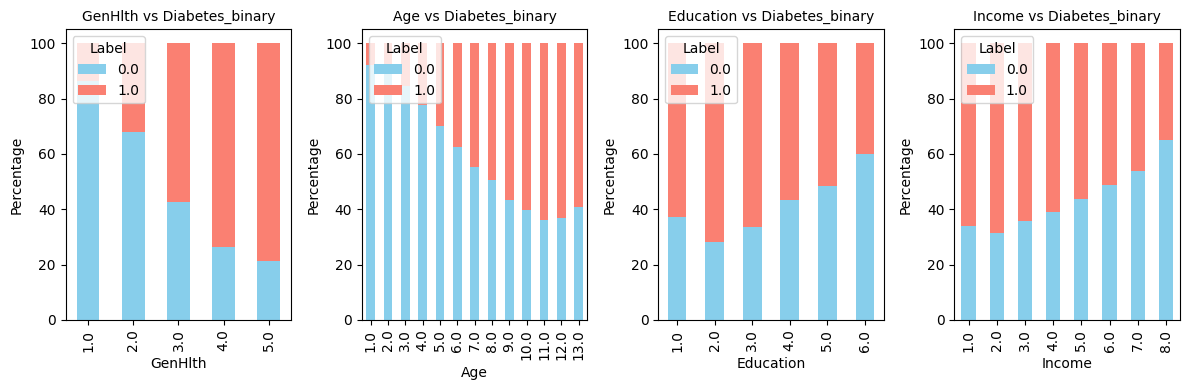

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử `features` là DataFrame chứa các cột cần vẽ
categorical_features = ['GenHlth', 'Age', 'Education', 'Income']  # Các cột phân loại
target_col = 'Diabetes_binary'  # Cột mục tiêu

# Thiết lập kích thước lưới subplot
num_features = len(categorical_features)
fig, axes = plt.subplots(
    nrows=(num_features + 3) // 4,  # Số hàng
    ncols=4,                        # Số cột
    figsize=(12, 4 * ((num_features + 1) // 4)),  # Kích thước tổng thể
)

axes = axes.flatten()  # Chuyển axes thành 1D để dễ truy cập

for i, feature in enumerate(categorical_features):
    # Bảng tần suất chéo với phần trăm
    crosstab = pd.crosstab(
        features[feature],
        features[target_col],
        normalize='index'  # Chuẩn hóa theo hàng
    ) * 100

    # Vẽ biểu đồ stacked bar
    crosstab.plot(
        kind='bar',
        stacked=True,
        ax=axes[i],  # Subplot tương ứng
        color=['skyblue', 'salmon']  # Màu tùy chỉnh
    )

    # Tùy chỉnh tiêu đề và nhãn
    axes[i].set_title(f'{feature} vs {target_col}', fontsize=10)
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Percentage')
    axes[i].legend(title='Label', loc='upper left')

# Ẩn các subplot thừa (nếu có)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


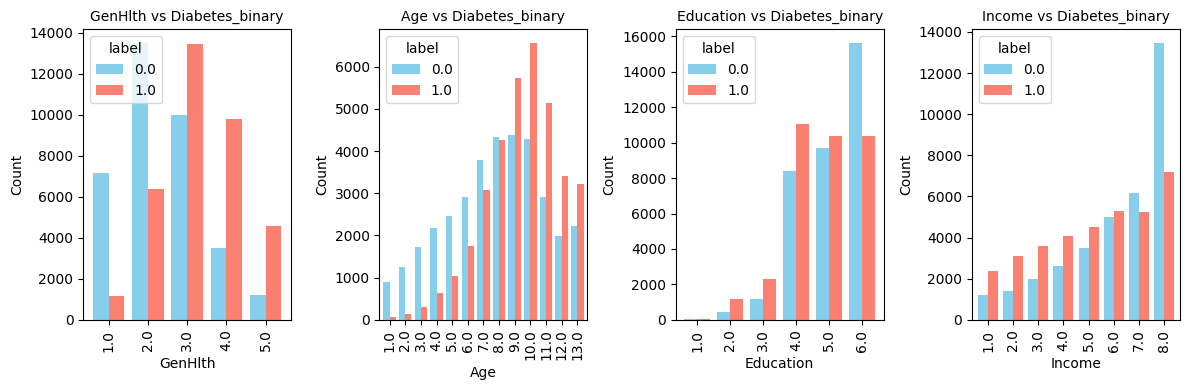

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử `features` là DataFrame chứa các cột cần vẽ
categorical_features = [
    'GenHlth', 'Age', 'Education', 'Income'
]  # Các cột phân loại
target_col = 'Diabetes_binary'  # Cột mục tiêu

# Thiết lập kích thước lưới subplot
num_features = len(categorical_features)
fig, axes = plt.subplots(
    nrows=(num_features + 2) // 4,  # Số hàng
    ncols=4,                        # Số cột
    figsize=(12, 4 * ((num_features + 1) // 4)),  # Kích thước tổng thể
)

axes = axes.flatten()  # Chuyển axes thành 1D để dễ truy cập

for i, feature in enumerate(categorical_features):
    # Bảng tần suất chéo không chuẩn hóa (số lượng nhãn)
    crosstab = pd.crosstab(features[feature], features[target_col])

    # Vẽ biểu đồ cột theo nhóm (Grouped Bar Chart)
    crosstab.plot(
        kind='bar',
        ax=axes[i],  # Subplot tương ứng
        color=['skyblue', 'salmon'],  # Màu tùy chỉnh
        width=0.8  # Độ rộng của các cột
    )

    # Tùy chỉnh tiêu đề và nhãn
    axes[i].set_title(f'{feature} vs {target_col}', fontsize=10)
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='label', loc='upper left')

# Ẩn các subplot thừa (nếu có)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

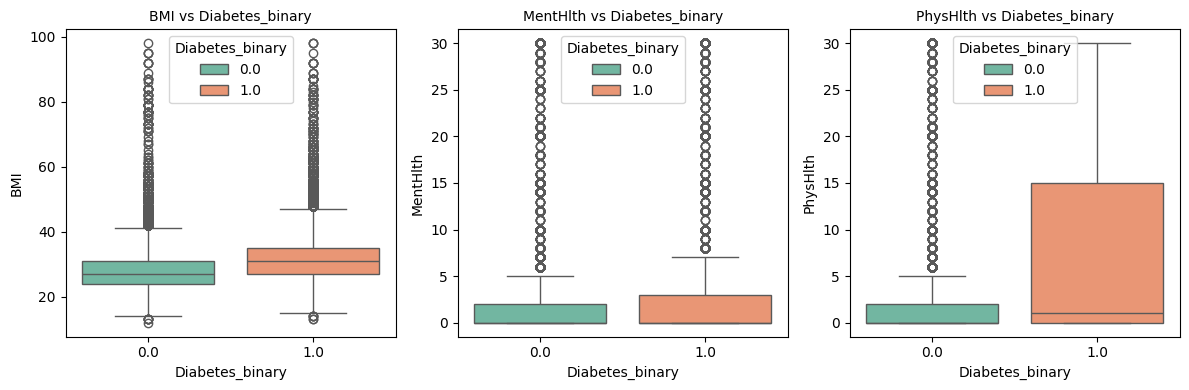

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử `features` là DataFrame chứa các cột cần vẽ
categorical_features = [
    'BMI', 'MentHlth', 'PhysHlth'
]  # Các cột phân loại
target_col = 'Diabetes_binary'  # Cột mục tiêu

# Thiết lập kích thước cho các biểu đồ
num_features = len(categorical_features)
fig, axes = plt.subplots(
    nrows=(num_features + 2) // 4,  # Số hàng
    ncols=3,                        # Số cột
    figsize=(12, 4 * ((num_features + 1) // 3)),  # Kích thước tổng thể
)

axes = axes.flatten()  # Chuyển axes thành 1D để dễ truy cập

for i, feature in enumerate(categorical_features):
    # Vẽ biểu đồ hộp (Boxplot) sử dụng seaborn
    sns.boxplot(x=features[target_col], y=features[feature], ax=axes[i], palette="Set2", hue=features[target_col])

    # Tùy chỉnh tiêu đề và nhãn
    axes[i].set_title(f'{feature} vs {target_col}', fontsize=10)
    axes[i].set_xlabel(f'{target_col}')
    axes[i].set_ylabel(f'{feature}')

# Ẩn các subplot thừa (nếu có)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


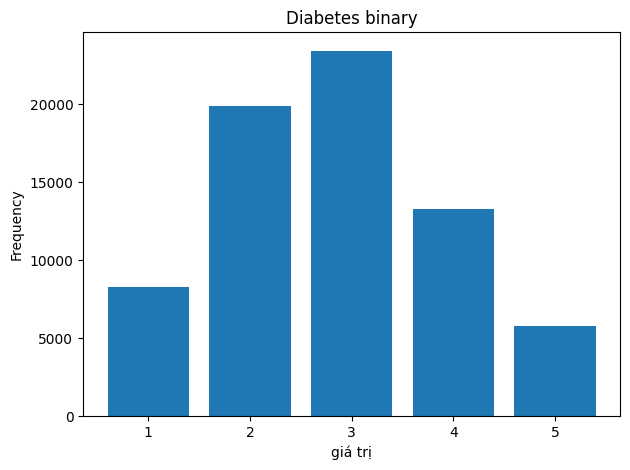

In [ ]:
# Tính tần suất của các giá trị phân loại
category_counts = features['GenHlth'].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.bar(category_counts.index, category_counts.values)


# Tùy chỉnh biểu đồ
plt.title("Diabetes binary")
plt.xlabel("giá trị")
plt.ylabel("Frequency")
 # Đảm bảo các tên category không bị nghiêng
plt.tight_layout()
# Hiển thị biểu đồ
plt.show()

Đối với dữ liệu binary

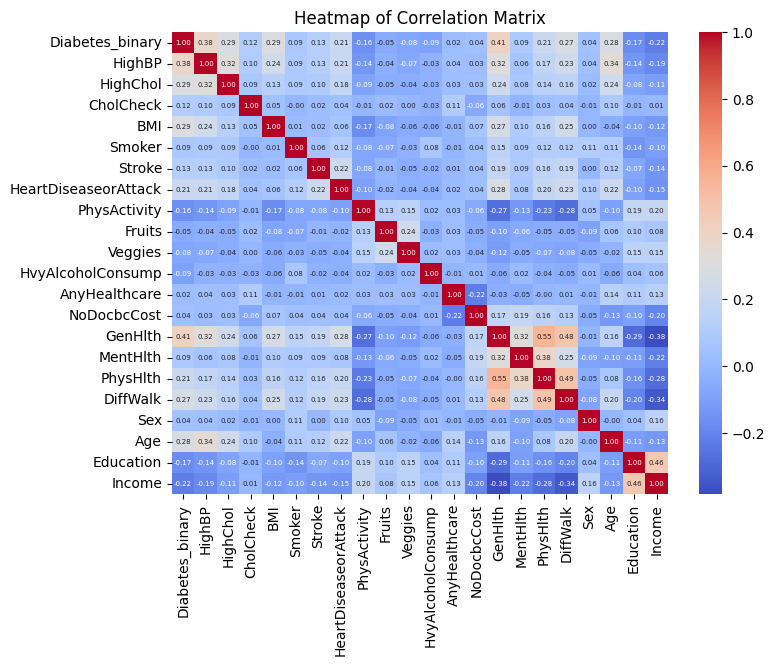

In [ ]:
corr_matrix = features.corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    annot_kws={"size": 5}
)
plt.title("Heatmap of Correlation Matrix")
plt.show()